# Logistic Regression

Despite the name, this model is a binary __classification model__ that will tell us the probability of a point belonging to a class rather than another.

## Theoretical aspects

### Odds

In a binary classification problem, let $p$ be the probability of the positive class. The _odds_ function $f(p)$ is defined as the ratio between the probability of the positive class and the probability of the negative class:

$$
    f(p) = \frac{p}{1 - p}
$$

By plotting this function we reasonably see that when $p\to 1$, $f(p)\to \infty$ meanwhile, when $p\to 0$, $f(p)\to 0$

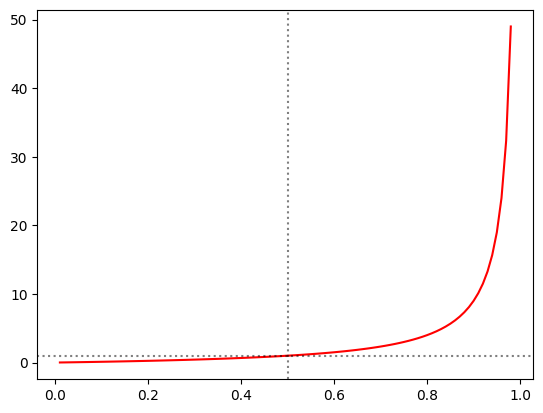

In [4]:
import matplotlib.pyplot as plt
import numpy as np

p = np.arange(0.01, 0.99, 0.01)

odds_ratio = p / (1 - p)

plt.plot(p, odds_ratio, color = "r")
plt.axvline(0.5, color='k', alpha = 0.5, linestyle = ":")
plt.axhline(1.0, color='k', alpha = 0.5, linestyle = ":")

### Logit function

We can now define the __logit__ function as $l(p) = \log(f(p))$, reason why it is also called _log-odds_ function:

$$
    \text{logit}(p) = l(p) = \log\left( \frac{p}{1 - p} \right)
$$

The _logit_ function is a monotonic transformation of the odds function $f$ as follows:

$$
    l(p)\,\, : \,\, \left[0, 1\right] \,\longrightarrow\, \mathopen]-\infty, +\infty\mathclose[
$$

The transformation maps the range $\left[0, 1\right]$ into the set of real numbers $\mathbb{R}$ as shown in the plot below


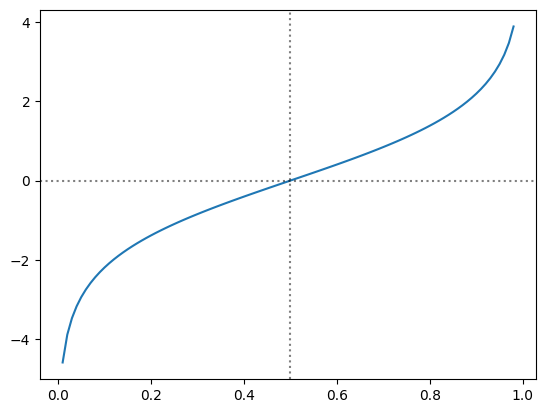

In [5]:
plt.plot(p, np.log(odds_ratio))

plt.axvline(0.5, color='k', alpha = 0.5, linestyle = ":")
plt.axhline(0.0, color='k', alpha = 0.5, linestyle = ":")

### Logistic $sigmoid$ function

We can now start to denote a vital function. If $p$ is the probability that a point $x$ in the dataset is classified in the positive class ($y = 1$) - which can be written as $p(y = 1 \,|\, x)$ - we can try to link this relationship with the _logit_ function as follows:

$$
    l\left(p(y = 1 \,|\, x)\right) = w_0x_0 + w_1x_1 + \dots + w_mx_m = w^Tx = z
$$

We can now inverse this relationship to understand how to calculate $z = w^Tx$ as follows:

$$
    z = \log\left( \frac{p}{1 - p} \right) \,\, \to \,\, e^z = \frac{p}{1 - p}
$$
$$
    (1 - p) e^z = p \,\, \to \,\, e^z - pe^z = p \,\, \to \,\, e^z = p(1 + e^z)
$$
$$
    p = \frac{e^z}{1 + e^z} \,\, = \,\, \boxed{ \frac{1}{1 + e^{-z}} }
$$

We will call this function, $\varphi(z)$, logistic __sigmoid__ function
$$
    \varphi(z) = \frac{1}{1 + e^{-z}}
$$

As we can see from the plots, in a monodimensional world, the sigmoid function is a probability distribution that indicates, based on the position of the monodimensional plane, what is the probability of a point being in the positive class. Reasonably, the more we go $\infty$, the more the probability decreases and vice versa. 


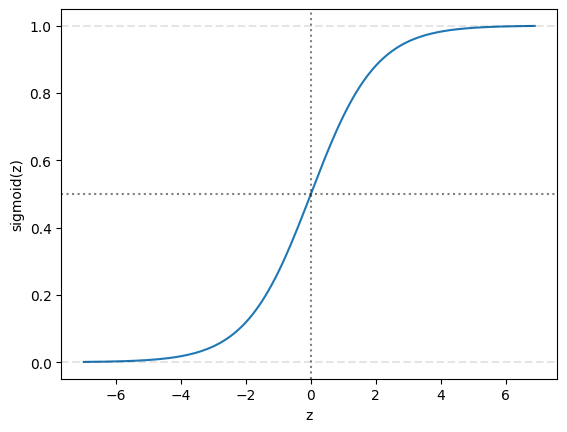

In [6]:
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

z = np.arange(-7, 7, 0.1)

phi_z = sigmoid(z)

plt.plot(z, phi_z)
plt.axvline(0.0, color='k', alpha = 0.5, linestyle = ":")
plt.axhline(0.5, color='k', alpha = 0.5, linestyle = ":")
#plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('sigmoid(z)')

plt.axhline(1.0, color='k', alpha = 0.1, linestyle = "--")
plt.axhline(0.0, color='k', alpha = 0.1, linestyle = "--")


## Logistic regression classifier

If we plug the sigmoid function $\varphi(z) = \varphi(w^Tx)$ at the output of a _perceptron_, we can obtain the probability that the object $x$ in the datapoint belongs to the positive class. To do such a thing we can decide a _threshold_ probability $\overline{p}$ and when $\varphi(w^Tx) > \overline{p}$ the classifier will label the point $x$ belonging to the positive class.

### Initial setup 



In [7]:
# write your answer here
import numpy as np

# set random seed
np.random.seed(123)

# generate N points per class
N = 100

# draw samples for X1
X1_1 = np.random.exponential(scale = 5.5, size = N) # monodimensional problem

# we would have the points in the same axisi, we are shifting them just to visualize them better
X1_2 = np.random.normal(loc = -2.5, scale = 1.5, size = N)

# set labels
y1 = np.ones(N)
y2 = np.zeros(N)

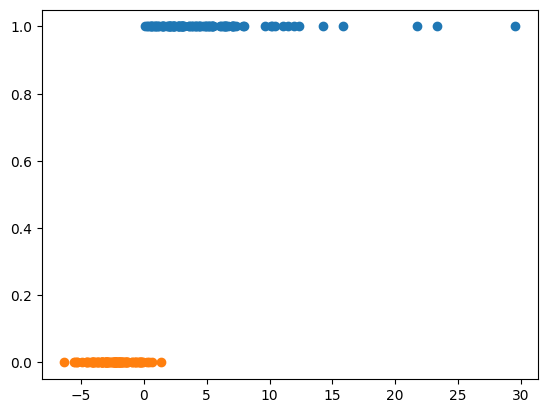

In [8]:
# write your answer here
import matplotlib.pyplot as plt

plt.scatter(X1_1, y1)
plt.scatter(X1_2, y2)

In [9]:
# write your answer here
X = np.stack((np.ones(N * 2),
              np.concatenate((X1_1, X1_2))), 
             axis = 1)

y = np.concatenate((y1, y2))

In [10]:
# write your answer here
# generate w_0,....,w_n
w = np.random.randn(2)

# set learning rate 
eta = 1e-2

# set mini-batch size
batch_size = 50

# set max epochs
max_epochs = 100

# set errors per epoch
errors_epoch = np.zeros(max_epochs)

# start training
for epochs in range(max_epochs):
    
    # output
    logreg_output = sigmoid(np.dot(X, w))

    # compute the log loss
    cost = (-y.dot(np.log(logreg_output)) - ((1 - y).dot(np.log(1 - logreg_output))))

    errors_epoch[epochs] = cost
    
    # compute (quantity) of error
    errors = (y - logreg_output)
    
    # generate random permutation for stochastic gradient descent
    rand_perm = np.random.permutation(range(y.shape[0]))
    X = X[rand_perm, :]
    y = y[rand_perm]
    
    # mini-batch learning
    for j in range(0, y.shape[0], batch_size):
        
        X_batch = X[j:(j + batch_size), :]
        
        y_batch = y[j:(j + batch_size)]
        
        # output
        logreg_output = sigmoid(np.dot(X_batch, w))
        
        errors = (y_batch - logreg_output)
        
        w = w + eta * np.dot(np.transpose(X_batch), errors) / X_batch.shape[0]   

print(w)

[-0.35858446  1.13275893]


give a point of coodrinate 1, ask what is the probabitli that it is positivo or negative? By looking at the signoid is almost .5
If we gve a value 5, we put it on the signmoid and gives almost 1s.

Difficucult part is in the middle of the sigmoid, problem is that we do not know how to decide.

By not setting the cost of making mistake, we are assuming that we lose 1 or 0. If the costs are different we are shifting the threshold from .5 to .8 or .9.


We are in a monodimnsional problem, meaning that we hre having 1 feature only. We may improve the situtation by incrasing the amout of situation we have. By adding feature we are adding information to the problem. The monodimensional problem is a simple way we are drowing the sigmod. With lots of feature, we are ahving a n dimensional sigmoid. In 2 dimensione we have on top of the plane a sort of wave

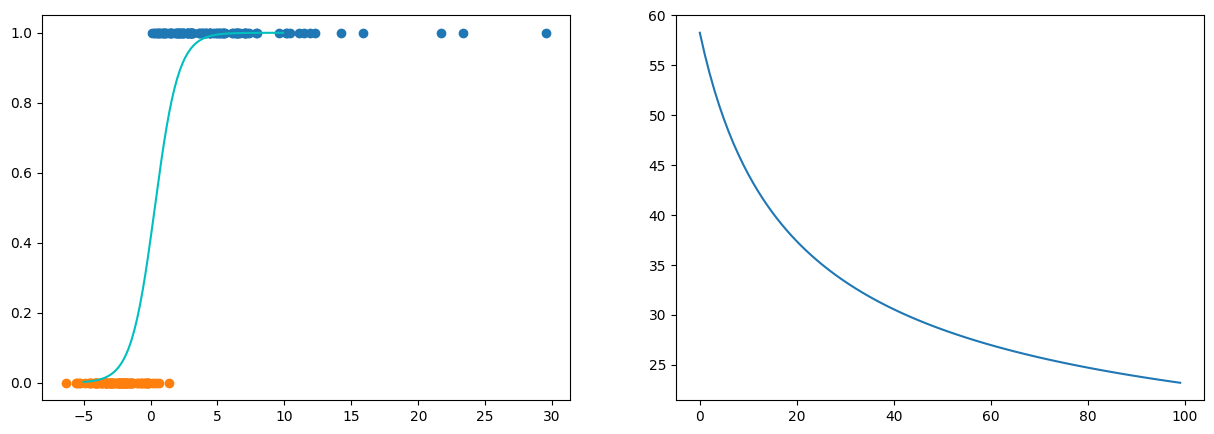

In [11]:
# write your answer here
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(15, 5), sharey=False)

axs[0].scatter(X1_1, y1)
axs[0].scatter(X1_2, y2)
#plt.scatter(X1_1, y1)
#plt.scatter(X1_2, y2)

zz = np.arange(-5, 10, 0.1)

# write your answer here
xx = np.stack((np.ones(len(zz)),
              zz), 
              axis = 1)


axs[0].plot(zz, sigmoid(np.dot(xx, w)), c = "c")


axs[1].plot(range(max_epochs), errors_epoch)